In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')

# Combine title and text columns into one feature
df['text'] = df['title'] + " " + df['text']

# Drop null values if any
df.dropna(subset=['text'], inplace=True)

# Text preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the text column
df['text'] = df['text'].apply(preprocess_text)

# Extract features and labels
X = df['text']
y = df['label']

# Encode the labels (0 = fake, 1 = real)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shape of the data
print(f'Training data shape: {X_train_tfidf.shape}')
print(f'Testing data shape: {X_test_tfidf.shape}')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Training data shape: (57229, 207943)
Testing data shape: (14308, 207943)


In [3]:
# Display the first 10 rows of the preprocessed text and labels
print(df[['text', 'label']].head(10))


                                                 text  label
0   law enforcement high alert following threats c...      1
2   unbelievable obama attorney general says charl...      1
3   bobby jindal raised hindu uses story christian...      0
4   satan russia unvelis image terrifying new supe...      1
5   time christian group sues amazon splc designat...      1
6   dr ben carson targeted irs never audit spoke n...      1
7   house intel chair trump russia fake story evid...      1
8   sports bar owner bans nfl games show true amer...      1
9   latest pipeline leak underscores dangers dakot...      1
10  gop senator smacked punchable alt right nazi i...      1


Accuracy: 94.58%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7081
           1       0.94      0.95      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308

Confusion Matrix:
[[6633  448]
 [ 327 6900]]


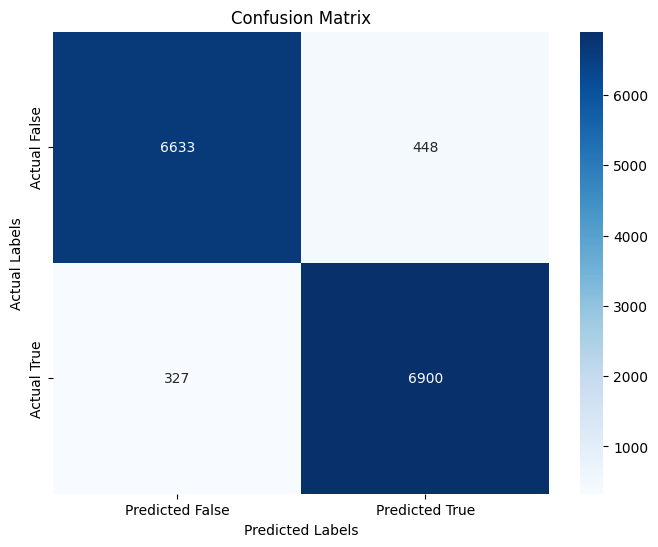

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


Random Forest Accuracy: 93.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7081
           1       0.93      0.94      0.94      7227

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308

Confusion Matrix:
[[6594  487]
 [ 436 6791]]


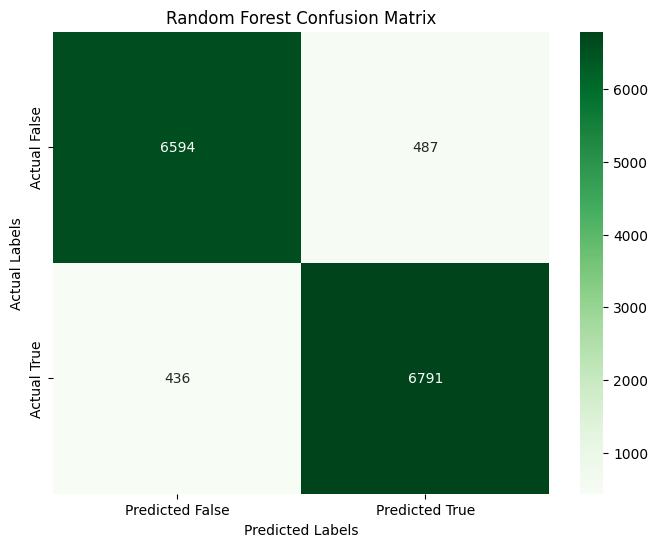

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Random Forest Confusion Matrix")
plt.show()


Passive Aggressive Classifier Accuracy: 95.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7081
           1       0.95      0.97      0.96      7227

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308

Confusion Matrix:
[[6728  353]
 [ 249 6978]]


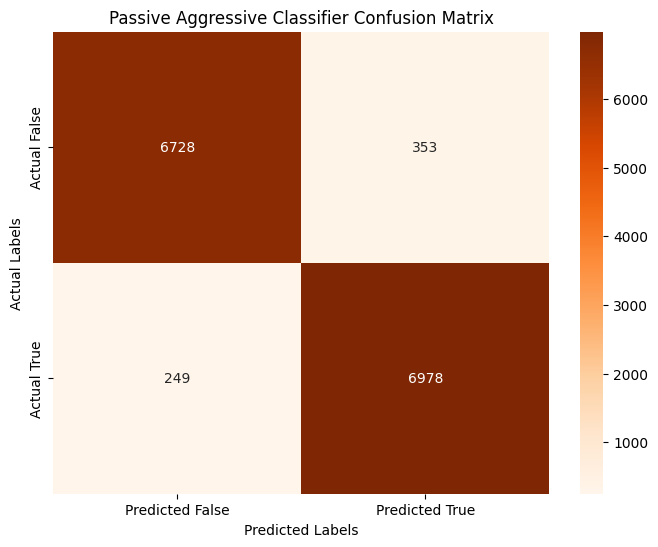

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Passive Aggressive Classifier
pac_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

# Train the model on the training data
pac_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_pac = pac_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_pac = accuracy_score(y_test, y_pred_pac)
print(f'Passive Aggressive Classifier Accuracy: {accuracy_pac * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_pac))

# Confusion matrix
conf_matrix_pac = confusion_matrix(y_test, y_pred_pac)
print('Confusion Matrix:')
print(conf_matrix_pac)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pac, annot=True, fmt="d", cmap="Oranges", xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Passive Aggressive Classifier Confusion Matrix")
plt.show()


XGBoost Classifier Accuracy: 96.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      7081
           1       0.95      0.98      0.96      7227

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308

Confusion Matrix:
[[6701  380]
 [ 161 7066]]


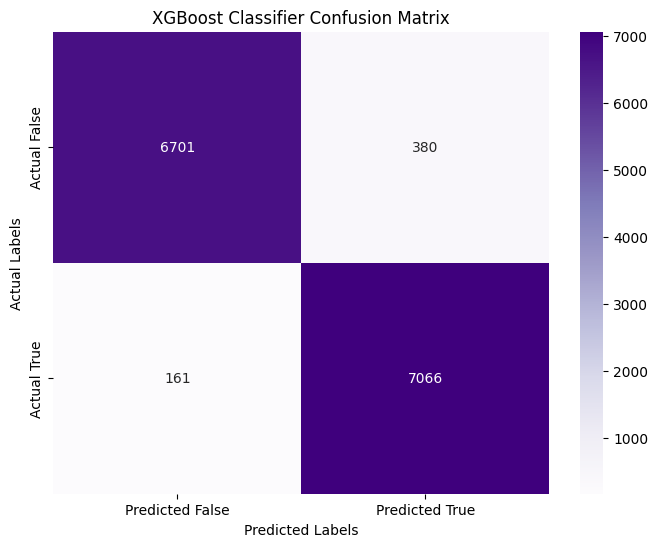

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix_xgb)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Purples", xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("XGBoost Classifier Confusion Matrix")
plt.show()


Accuracy: 96.08%
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7081
           1       0.95      0.97      0.96      7227

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



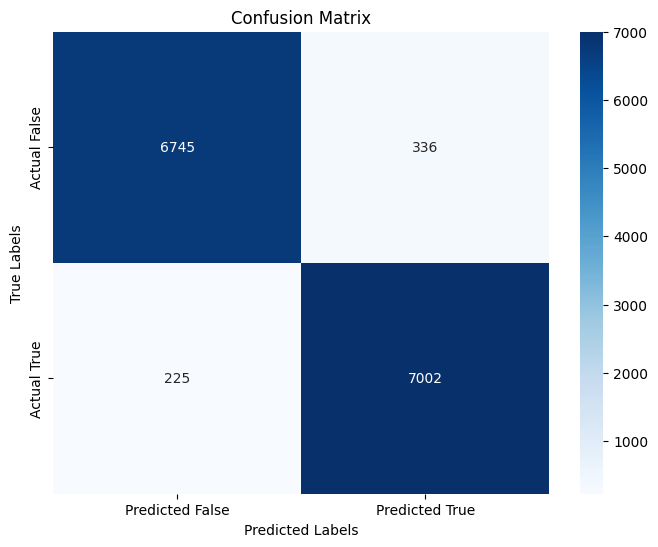

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Assuming `df` is the preprocessed DataFrame with `text` and `label` columns

# Extract features and labels
X = df['text']
y = df['label']

# Encode the labels (0 = fake, 1 = real)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine with a linear kernel
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, '/kaggle/working/xgboost_model.pkl')
joblib.dump(pac_model,'/kaggle/working/pac_model.pkl')
joblib.dump(rf_model,'/kaggle/working/rf_model.pkl')
joblib.dump(lr_model,'/kaggle/working/lr_model.pkl')
joblib.dump(tfidf_vectorizer, '/kaggle/working/tfidf_vectorizer.pkl')
joblib.dump(svm_model,'/kaggle/working/svm_model.pkl')

['/kaggle/working/svm_model.pkl']

In [15]:
import joblib
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the saved XGBoost model
xgb_model = joblib.load('/kaggle/working/xgboost_model.pkl')
# Load the saved Passive Aggressive model
pac_model = joblib.load('/kaggle/working/pac_model.pkl')
# Load the saved Random Forest model
rf_model = joblib.load('/kaggle/working/rf_model.pkl')
# Load the saved Logistic Regression model
lr_model = joblib.load('/kaggle/working/lr_model.pkl')
# Load the saved Support Vector Machine model
svm_model=joblib.load('/kaggle/working/svm_model.pkl')
# Load the TF-IDF vectorizer used for training
tfidf_vectorizer = joblib.load('/kaggle/working/tfidf_vectorizer.pkl')

# Function for text preprocessing
def preprocess_input(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Get user input
user_input = input("Enter the news article: ")

# Preprocess user input
processed_input = preprocess_input(user_input)

# Transform the input using the TF-IDF vectorizer
input_tfidf = tfidf_vectorizer.transform([processed_input])

# Make predictions with all models
xgb_pred = xgb_model.predict(input_tfidf)
pac_pred = pac_model.predict(input_tfidf)
rf_pred = rf_model.predict(input_tfidf)
lr_pred = lr_model.predict(input_tfidf)
svm_pred=svm_model.predict(input_tfidf)
# Output predictions
print(f"\nPredictions for the input article:")
print(f"XGBoost Prediction: {'Real' if xgb_pred[0] == 1 else 'Fake'}")
print(f"Passive Aggressive Prediction: {'Real' if pac_pred[0] == 1 else 'Fake'}")
print(f"Random Forest Prediction: {'Real' if rf_pred[0] == 1 else 'Fake'}")
print(f"Logistic Regression Prediction: {'Real' if lr_pred[0] == 1 else 'Fake'}")
print(f"Support Vector Machine Prediction:{'Real' if svm_pred[0] == 1 else 'Fake'}")


Enter the news article:  The Zika Virus Is Harmless - It Does Not Cause Birth Defects - We Told You So   Moon of Alabama   After nearly a year of causing hysteria, mass travel cancellations and unnecessary abortions it finally daunts to "journalists" and "experts" that the Zika virus is harmless. It can cause a very minor flue - two days of a low fever and uncomfortable feeling for a quarter of those infected - that is all. It does not cause, as was claimed by sensationalists in the media and various self-serving "scientists", birth defects like microcephaly.  We told you so.  The piece refereed to a Congressional Research Service report and various sound scientific papers. It concluded: There is absolutely no sane reason for the scary headlines and the panic they cause.  The virus is harmless. It is possible, but seems for now very unlikely, that it affects some unborn children. There is absolutely no reason to be concerned about it.  The artificial media panic continued and huge amou


Predictions for the input article:
XGBoost Prediction: Real
Passive Aggressive Prediction: Real
Random Forest Prediction: Real
Logistic Regression Prediction: Real
Support Vector Machine Prediction:Real


In [2]:
!pip show joblib



Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /opt/conda/lib/python3.10/site-packages
Requires: 
Required-by: cesium, imbalanced-learn, librosa, mlxtend, nilearn, phik, pins, pyLDAvis, rgf-python, scikit-learn, scikit-optimize, scikit-plot, scikit-surprise, TPOT
